`Creating Models`
##### https://pytorch.org/docs/stable/nn.html

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__


'1.13.1+cu116'

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

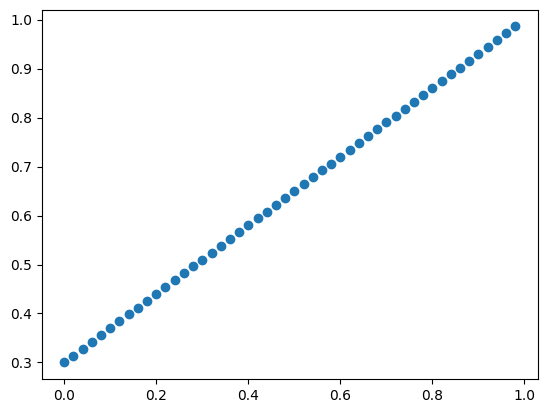

In [3]:
#data preparing and loading
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1) #adds dimenation: the index at which to insert the singleton dimension
y=weight*x+bias
plt.plot(x,y,'o')
x[:10],y[:10]

In [4]:
#splitting data into training stet and test set
train_split=int(len(x)*0.8)
train_x=x[:train_split]
train_y=y[:train_split]
test_x=x[train_split:]
test_y=y[train_split:]
train_x,train_y
len(train_x),len(test_x)


(40, 10)

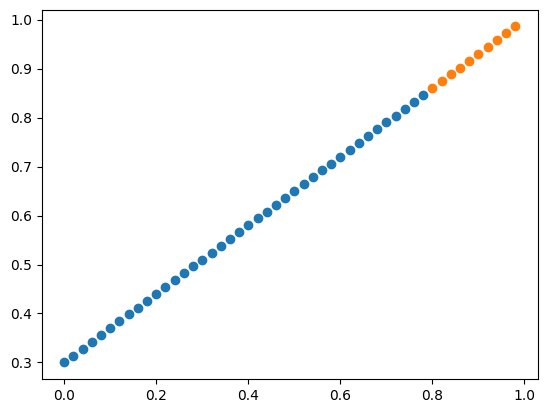

In [5]:
 #visualize data
plt.plot(train_x,train_y,'o')
plt.plot(test_x,test_y,'o')

In [6]:
def plot_predections(train_data=train_x,train_labels=train_y,test_data=test_x,test_labels=test_y,predictions=None):
    plt.plot(train_data,train_labels,'o')
    plt.plot(test_data,test_labels,'o')
    if predictions is not None:
        plt.plot(test_data,predictions,'o')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(['train data','test data','predictions'])
    plt.show()      

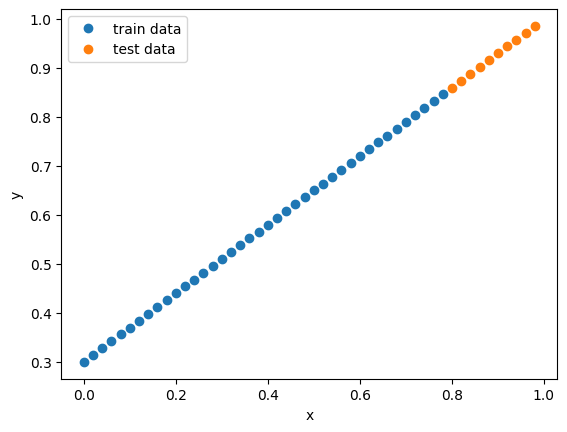

In [7]:
plot_predections()

In [8]:
#create linear regression model
#gradient descent and back propagation

class LinearRegressionModel(nn.Module):
#  nn.Module is the base class for all neural network modules
    def __init__(self):
        super().__init__() #childclass of nn.Module
        self.weights = nn.Parameter(torch.randn(1,dtype=torch.float32),requires_grad=True) 
#keep trakc of the weights and bias
        self.bias = nn.Parameter(torch.randn(1,dtype=torch.float32),requires_grad=True) 

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: #overriding the forward method of nn.Module
        return self.weights * x + self.bias 

In [10]:
torch.manual_seed(0) #set the seed for reproducibility
model_0 = LinearRegressionModel() #create a model
list(model_0.parameters()) #print the parameters of the model
model_0.state_dict() #print the state of the parameters of the model

OrderedDict([('weights', tensor([1.5410])), ('bias', tensor([-0.2934]))])

In [11]:
test_x,test_y

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [12]:
with torch.inference_mode():
    y_preds=model_0(test_x)
y_preds

tensor([[0.9394],
        [0.9702],
        [1.0010],
        [1.0318],
        [1.0626],
        [1.0935],
        [1.1243],
        [1.1551],
        [1.1859],
        [1.2167]])

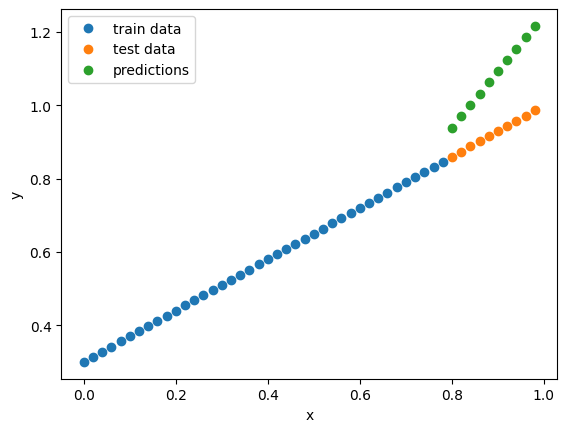

In [13]:
plot_predections(predictions=y_preds)